<a href="https://colab.research.google.com/github/rafaelschweder/bootcamp-analista-de-dados-igti/blob/master/trabalho-pratico-modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho Prático - Módulo 1

##Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo 1:
- Uso do Google Colab
- Uso do Power BI
- Algoritmo K-Means

##Enunciado (Python)

Para as questões de 1 a 7 trabalharemos com python e o algoritmo K-Means. Serão fornecidos alguns trechos de código para auxiliar na execução. Considere um dataset gerado pelo seguinte comando:

```python
make_blobs(n_samples=500, centers=20, random_state=999)
```


Ao executar o algoritmo K-Means, considere os parâmetros:
- init = k-means++
- max_iter = 300
- n_init = 10

##Enunciado (PowerBI)

Para as questões de 8 a 12, instale o **Power BI Desktop** e baixe o dataset [Novel Corona Virus 2019](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv) e carregue os dados no Power BI. Atenção aos tipos de dados de cada coluna. Crie uma nova medida chamada “Active” para calcular o número de casos ativos, que é no caso é o valor da coluna “Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar a sua visualização, de acordo com a questão.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from math import sqrt

Criação de dataset conforme enunciado do exercício:

In [0]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)

Visualização da distrubuição do dataset criado.

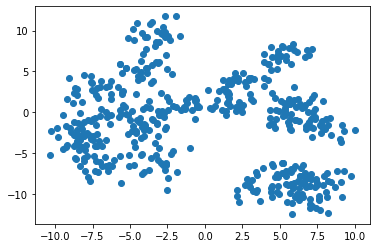

In [99]:
plt.scatter(X[:,0], X[:,1])

Inicialização do K-Means conforme enunciado do exercício:


In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

Visualização da distribuição em clusters (5).

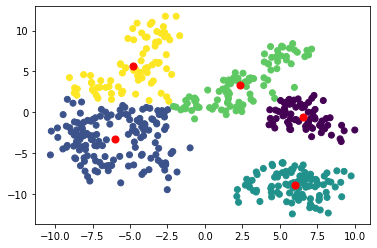

In [98]:
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

Definição de função para o cálculo do número ideal de clusters.

In [0]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Simulação para identificação do número idetal de clusters. Testando de 1 a 20 clusters.

In [0]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    optimal = optimal_number_of_clusters(wcss)

##Pergunta 1
Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?


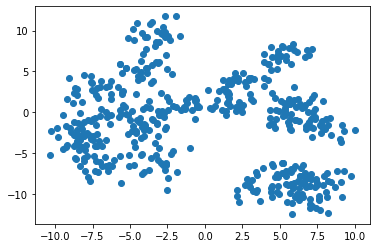

In [102]:
plt.scatter(X[:,0], X[:,1])

##Pergunta 2
O algoritmo K-Means é baseado em qual tipo de aprendizagem?

R: Não supervisionada.

##Pergunta 3
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

In [103]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
print(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

[0.02618523] [-1.30384304]


##Pergunta 4
Considere o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

Número ideal de clusters: 5


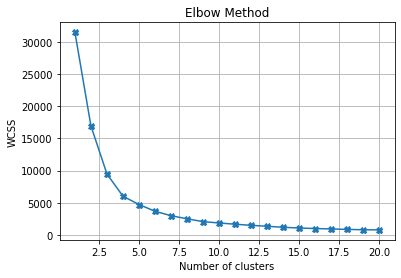

In [105]:
print('Número ideal de clusters:', optimal)

plt.plot(range(1, 21), wcss, marker="X")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

##Pergunta 5
Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico?

![R5](https://i.imgur.com/jqAUiW2.png)

##Pergunta 6
Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy). Analise as informações do dataset e responda: em que mês a Itália passou a ter mais casos recuperados do que casos ativos?

![R6](https://i.imgur.com/dTRHzfO.png)

##Pergunta 7
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [106]:
wcss[4]

4717.404091931214

##Pergunta 8
Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active”, apenas para a Itália (Italy), como fica o gráfico?

![R8](https://i.imgur.com/4Dt94Hl.png)

##Pergunta 9
Qual o objetivo do algoritmo K-Means?

R: Clusterização.

##Pergunta 10
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [107]:
wcss[0]

31547.372471390485

##Pergunta 11
Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

![](https://i.imgur.com/p6dEOID.png)

##Pergunta 12
Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?

![](https://i.imgur.com/rmHVjOf.png)